In [2]:
%load_ext autoreload
%autoreload 2
from gratin.standard import train_model, load_model, plot_demo, get_predictions
import socket

2022-05-19 15:05:48.109202: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
if "jbmasson" in socket.gethostname():
    export_path = "/home/hverdier/Gaia/hecat/hippo/models/andi_17may2022"
else:
    export_path = "/Users/hverdier/models/demo"

stage is None, strange...
Create TrajDataset, seed_offset = 100000
Create TrajDataset, seed_offset = 0
Create TrajDataset, seed_offset = 200000


/home/hverdier/miniconda3/envs/napari-env/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
/home/hverdier/miniconda3/envs/napari-env/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /home/hverdier/Gaia/hecat/hippo/models/andi_17may2022 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 200000


Training: 0it [00:00, ?it/s]

/home/hverdier/miniconda3/envs/napari-env/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:59: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 3. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


Validating: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 300000


Validating: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 400000


Validating: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 500000


Validating: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 600000


Validating: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 700000


Validating: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 800000
Create TrajDataset, seed_offset = 900000


/home/hverdier/miniconda3/envs/napari-env/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'alpha_test_MeanAbsoluteError': 0.19725260138511658,
 'alpha_test_loss': 0.19896218180656433,
 'model_test_F1Score': 0.7549078464508057,
 'model_test_loss': 0.360143780708313,
 'test_loss': 0.5199248194694519}
--------------------------------------------------------------------------------
[{'alpha_test_loss': 0.19896218180656433, 'alpha_test_MeanAbsoluteError': 0.19725260138511658, 'model_test_loss': 0.360143780708313, 'model_test_F1Score': 0.7549078464508057, 'test_loss': 0.5199248194694519}]
Create TrajDataset, seed_offset = 900000


2022-05-17 23:09:13.924156: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-05-17 23:09:13.924672: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: Quadro P6000 computeCapability: 6.1
coreClock: 1.645GHz coreCount: 30 deviceMemorySize: 23.87GiB deviceMemoryBandwidth: 403.49GiB/s
2022-05-17 23:09:13.924703: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-05-17 23:09:13.924752: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-05-17 23:09:13.924780: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-05-17 23:09:13.924813: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

ParametricUMAP(encoder=<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe0942341f0>, optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fe08c50d7c0>)
Tue May 17 23:09:13 2022 Construct fuzzy simplicial set
Tue May 17 23:09:13 2022 Finding Nearest Neighbors
Tue May 17 23:09:13 2022 Building RP forest with 10 trees
Tue May 17 23:09:14 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Tue May 17 23:09:28 2022 Finished Nearest Neighbor Search
Tue May 17 23:09:31 2022 Construct embedding
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


2022-05-17 23:09:51.884228: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-17 23:09:51.903756: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3591950000 Hz


Epoch 1/10
6097/6097 [==============================] - 20s 3ms/step - loss: 0.1096
Epoch 2/10
6097/6097 [==============================] - 19s 3ms/step - loss: 0.0916
Epoch 3/10
6097/6097 [==============================] - 19s 3ms/step - loss: 0.0906
Epoch 4/10
6097/6097 [==============================] - 19s 3ms/step - loss: 0.0899
Epoch 5/10
6097/6097 [==============================] - 19s 3ms/step - loss: 0.0895
Epoch 6/10
6097/6097 [==============================] - 19s 3ms/step - loss: 0.0892
Epoch 7/10
6097/6097 [==============================] - 19s 3ms/step - loss: 0.0890
Epoch 8/10
6097/6097 [==============================] - 19s 3ms/step - loss: 0.0888
Epoch 9/10
6097/6097 [==============================] - 19s 3ms/step - loss: 0.0886
Epoch 10/10
312/312 [==============================] - 0s 570us/step
Tue May 17 23:13:06 2022 Finished embedding


2022-05-17 23:13:07.159971: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/hverdier/Gaia/hecat/hippo/models/andi_17may2022/umap/assets


/home/hverdier/miniconda3/envs/napari-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hverdier/miniconda3/envs/napari-env/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


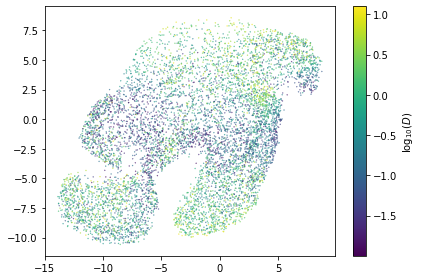

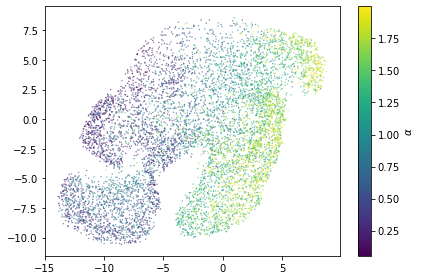

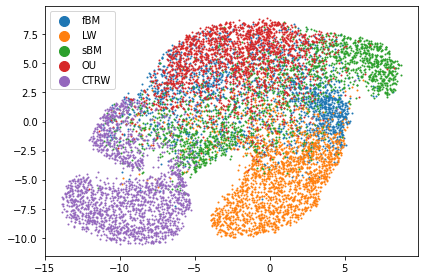

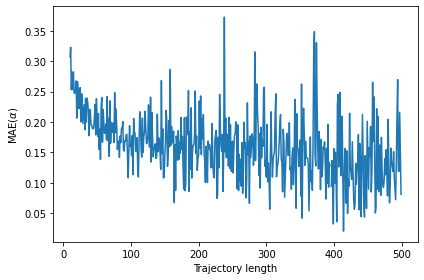

In [8]:
model, encoder = train_model(
    export_path= export_path,
    max_n_epochs=50,
    length_range=(10,500),
    num_workers=10,
    time_delta=.03)

In [4]:
model, encoder = load_model(export_path)

2022-05-19 15:06:41.933151: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-05-19 15:06:41.933822: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: Quadro P6000 computeCapability: 6.1
coreClock: 1.645GHz coreCount: 30 deviceMemorySize: 23.87GiB deviceMemoryBandwidth: 403.49GiB/s
2022-05-19 15:06:41.933866: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-05-19 15:06:41.933924: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-05-19 15:06:41.933965: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-05-19 15:06:41.934012: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

stage is None, strange...
Create TrajDataset, seed_offset = 100000
Create TrajDataset, seed_offset = 0
Create TrajDataset, seed_offset = 200000
Create TrajDataset, seed_offset = 200000


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'alpha_test_MeanAbsoluteError': 0.19881625473499298,
 'alpha_test_loss': 0.2069142460823059,
 'model_test_F1Score': 0.7459936141967773,
 'model_test_loss': 0.3644312024116516,
 'test_loss': 0.5305226445198059}
--------------------------------------------------------------------------------
Create TrajDataset, seed_offset = 200000


/home/hverdier/miniconda3/envs/napari-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hverdier/miniconda3/envs/napari-env/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


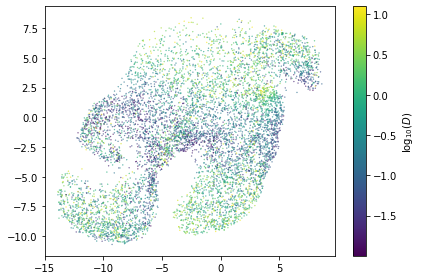

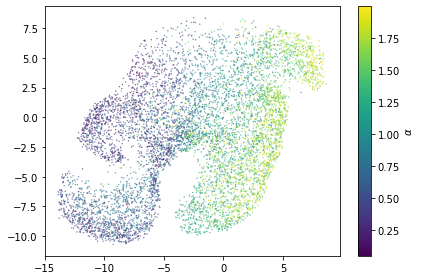

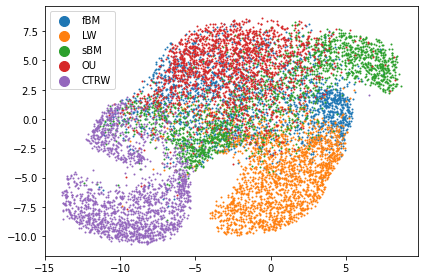

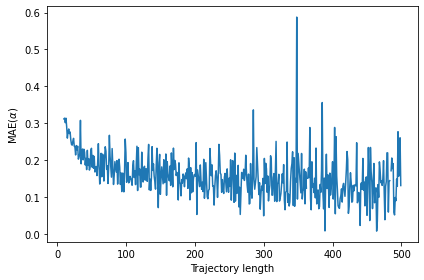

In [6]:
plot_demo(model,encoder,num_workers=4,time_delta=0.03,length_range=(10,500))

In [16]:
import numpy as np
D = 1. #um^2/s
delta_t = 0.03 # s
df = get_predictions(model, encoder, [np.cumsum(np.random.randn(100,2)*np.sqrt(2*D*delta_t),axis=0)  + np.random.normal(loc=0,scale=0.03,size=(100,2)) for i in range(1000)])

In [17]:
df.head()

,alpha,best_model,p_fBM,p_LW,p_sBM,p_OU,p_CTRW,U_1,U_2,h_1,...,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16
0,1.037283,OU,0.209404,0.000911,0.145068,0.644616,3.869333e-07,-0.212306,2.837767,-0.156621,...,1.661087,2.280865,-1.027182,-0.490931,-1.598866,1.584766,-1.424658,1.066976,-0.169066,-2.246578
1,0.976078,OU,0.158377,0.000096,0.106910,0.734613,4.416210e-06,0.124103,6.067890,-0.148998,...,0.886068,2.534052,-1.386504,-0.151236,-1.717015,1.085700,-0.962557,1.237003,0.239539,-2.247360
2,1.093882,sBM,0.249861,0.000105,0.400205,0.349828,1.440694e-06,1.544205,4.725868,-0.382156,...,1.246904,2.647225,-1.608561,0.475868,-2.102726,1.005047,-0.694165,1.311805,-0.188019,-2.573608
3,1.057119,sBM,0.247505,0.000175,0.443426,0.308887,8.224990e-06,1.724048,5.123591,-0.253055,...,0.990029,2.447190,-1.365257,0.672676,-1.847768,0.802108,-0.582972,1.263820,-0.176668,-2.231457
4,1.146663,fBM,0.491234,0.000350,0.473146,0.035269,6.865084e-07,2.648055,3.225582,-0.557795,...,1.581017,2.383447,-1.475476,1.299019,-2.237673,0.825409,-0.385005,1.236400,-0.958393,-2.590127


Text(0.5, 0, 'Inferred $\\alpha$')

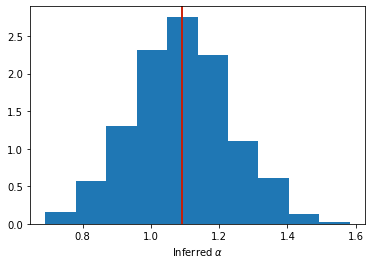

In [19]:
import matplotlib.pyplot as plt
plt.hist(df["alpha"],density=True)
plt.axvline(df["alpha"].mean(),label="Mean",c="green")
plt.axvline(df["alpha"].median(),label="Median",c="red")
plt.xlabel("Inferred $\\alpha$")